In [1]:
import numpy as np
import pandas as pd

from preprocessing import preprocess_data
from setup import setup_cmaes, eaGenerateUpdateRestarts
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, plot_fitness_over_generations

In [2]:
stock_data, ta_features, _ = preprocess_data("./data/wig_d.csv")
ta_features

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_cr
365,0.006009,0.094874,0.941641,0.800880,0.820727,0.901769,0.615958,0.136714,0.459783,0.341002,...,0.714163,0.847761,0.883304,0.550882,0.754635,0.800912,0.454282,0.095323,0.723399,0.217329
366,0.010085,0.067148,0.908381,0.790832,0.819671,0.900598,0.613798,0.138438,0.493822,0.341002,...,0.714442,0.843452,0.880940,0.545478,0.774311,0.824712,0.455591,0.095391,0.682926,0.216556
367,0.030662,0.093509,0.968945,0.836003,0.821472,0.900718,0.652594,0.140952,0.516197,0.369727,...,0.733597,0.845106,0.879435,0.552450,0.775482,0.844046,0.431166,0.095770,0.740789,0.231158
368,0.021698,0.128281,0.921666,0.831179,0.821483,0.899950,0.658175,0.144114,0.555109,0.369727,...,0.682954,0.845887,0.878413,0.556376,0.820520,0.870848,0.472013,0.096149,0.691829,0.232766
369,0.014627,0.103969,0.872146,0.805248,0.817366,0.900179,0.647337,0.146147,0.526596,0.360938,...,0.685832,0.843416,0.877019,0.553355,0.788863,0.884323,0.399113,0.096263,0.669190,0.228294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.976102,0.938315,0.783798,0.993424,0.871783,0.991989,0.811603,0.312019,0.649625,0.412539,...,0.921568,0.966601,0.937050,0.723119,0.714089,0.754736,0.447659,0.349639,0.825358,0.471939
2279,0.981290,0.923087,0.820142,0.955853,0.829428,0.982671,0.809756,0.323694,0.666461,0.410112,...,0.931230,0.984643,0.956861,0.725604,0.695299,0.767887,0.397341,0.371642,0.681307,0.470523
2280,0.981810,0.906549,0.779111,0.914818,0.819299,0.980124,0.802191,0.335261,0.582716,0.410112,...,0.931895,0.993649,0.974810,0.710479,0.690118,0.777104,0.375822,0.379975,0.668755,0.465184
2281,0.994691,0.928762,0.837785,0.910447,0.817958,0.979381,0.814606,0.347676,0.654219,0.410112,...,0.915056,1.000000,0.990651,0.693349,0.733067,0.795286,0.424862,0.388276,0.706705,0.471686


In [3]:
# CMAES algorithm parameters:
LAMBDA = 200
N_RESTARTS = 1
MAX_N_GENERATIONS = 1000

# Simulation parameters:
INITIAL_MONEY = 1000
COMMISSION = 0.0001 # 0.01%
# COMMISSION = 0

In [4]:
toolbox, stats, hall_of_fame = setup_cmaes(
    stock_data,
    ta_features,
    LAMBDA,
    INITIAL_MONEY,
    COMMISSION,
)

In [ ]:
best_logbook, logbooks = eaGenerateUpdateRestarts(
    toolbox,
    nrestarts=N_RESTARTS,
    maxngens=MAX_N_GENERATIONS,
    stats=stats,
    halloffame=hall_of_fame,
    verbose=True,
)

restart	gen	nevals	sigma   	avg           	std           	min           	max            
0      	0  	200   	0.942858	[955.08844269]	[146.62499595]	[583.94862211]	[1324.54043533]
0      	1  	200   	0.933252	[1009.66248398]	[107.85117713]	[630.42335661]	[1290.05943029]
0      	2  	200   	0.950426	[1057.61305576]	[109.17727624]	[661.1648138] 	[1490.70220384]
0      	3  	200   	0.977862	[1081.92572478]	[97.86717159] 	[705.38393055]	[1203.73179798]
0      	4  	200   	1.00028 	[1105.44627222]	[86.22687311] 	[720.39745167]	[1246.88439212]
0      	5  	200   	1.01692 	[1110.65663056]	[72.10516638] 	[875.6535207] 	[1220.69656573]
0      	6  	200   	1.02487 	[1102.49825345]	[89.41811168] 	[664.26830006]	[1345.29546655]
0      	7  	200   	1.04192 	[1116.89868343]	[78.9801168]  	[649.0662069] 	[1223.0583361] 
0      	8  	200   	1.03629 	[1122.34310666]	[76.85760454] 	[889.89303746]	[1342.52921334]
0      	9  	200   	1.01508 	[1089.57181535]	[94.0461437]  	[767.26368413]	[1223.10599658]
0      	10 	

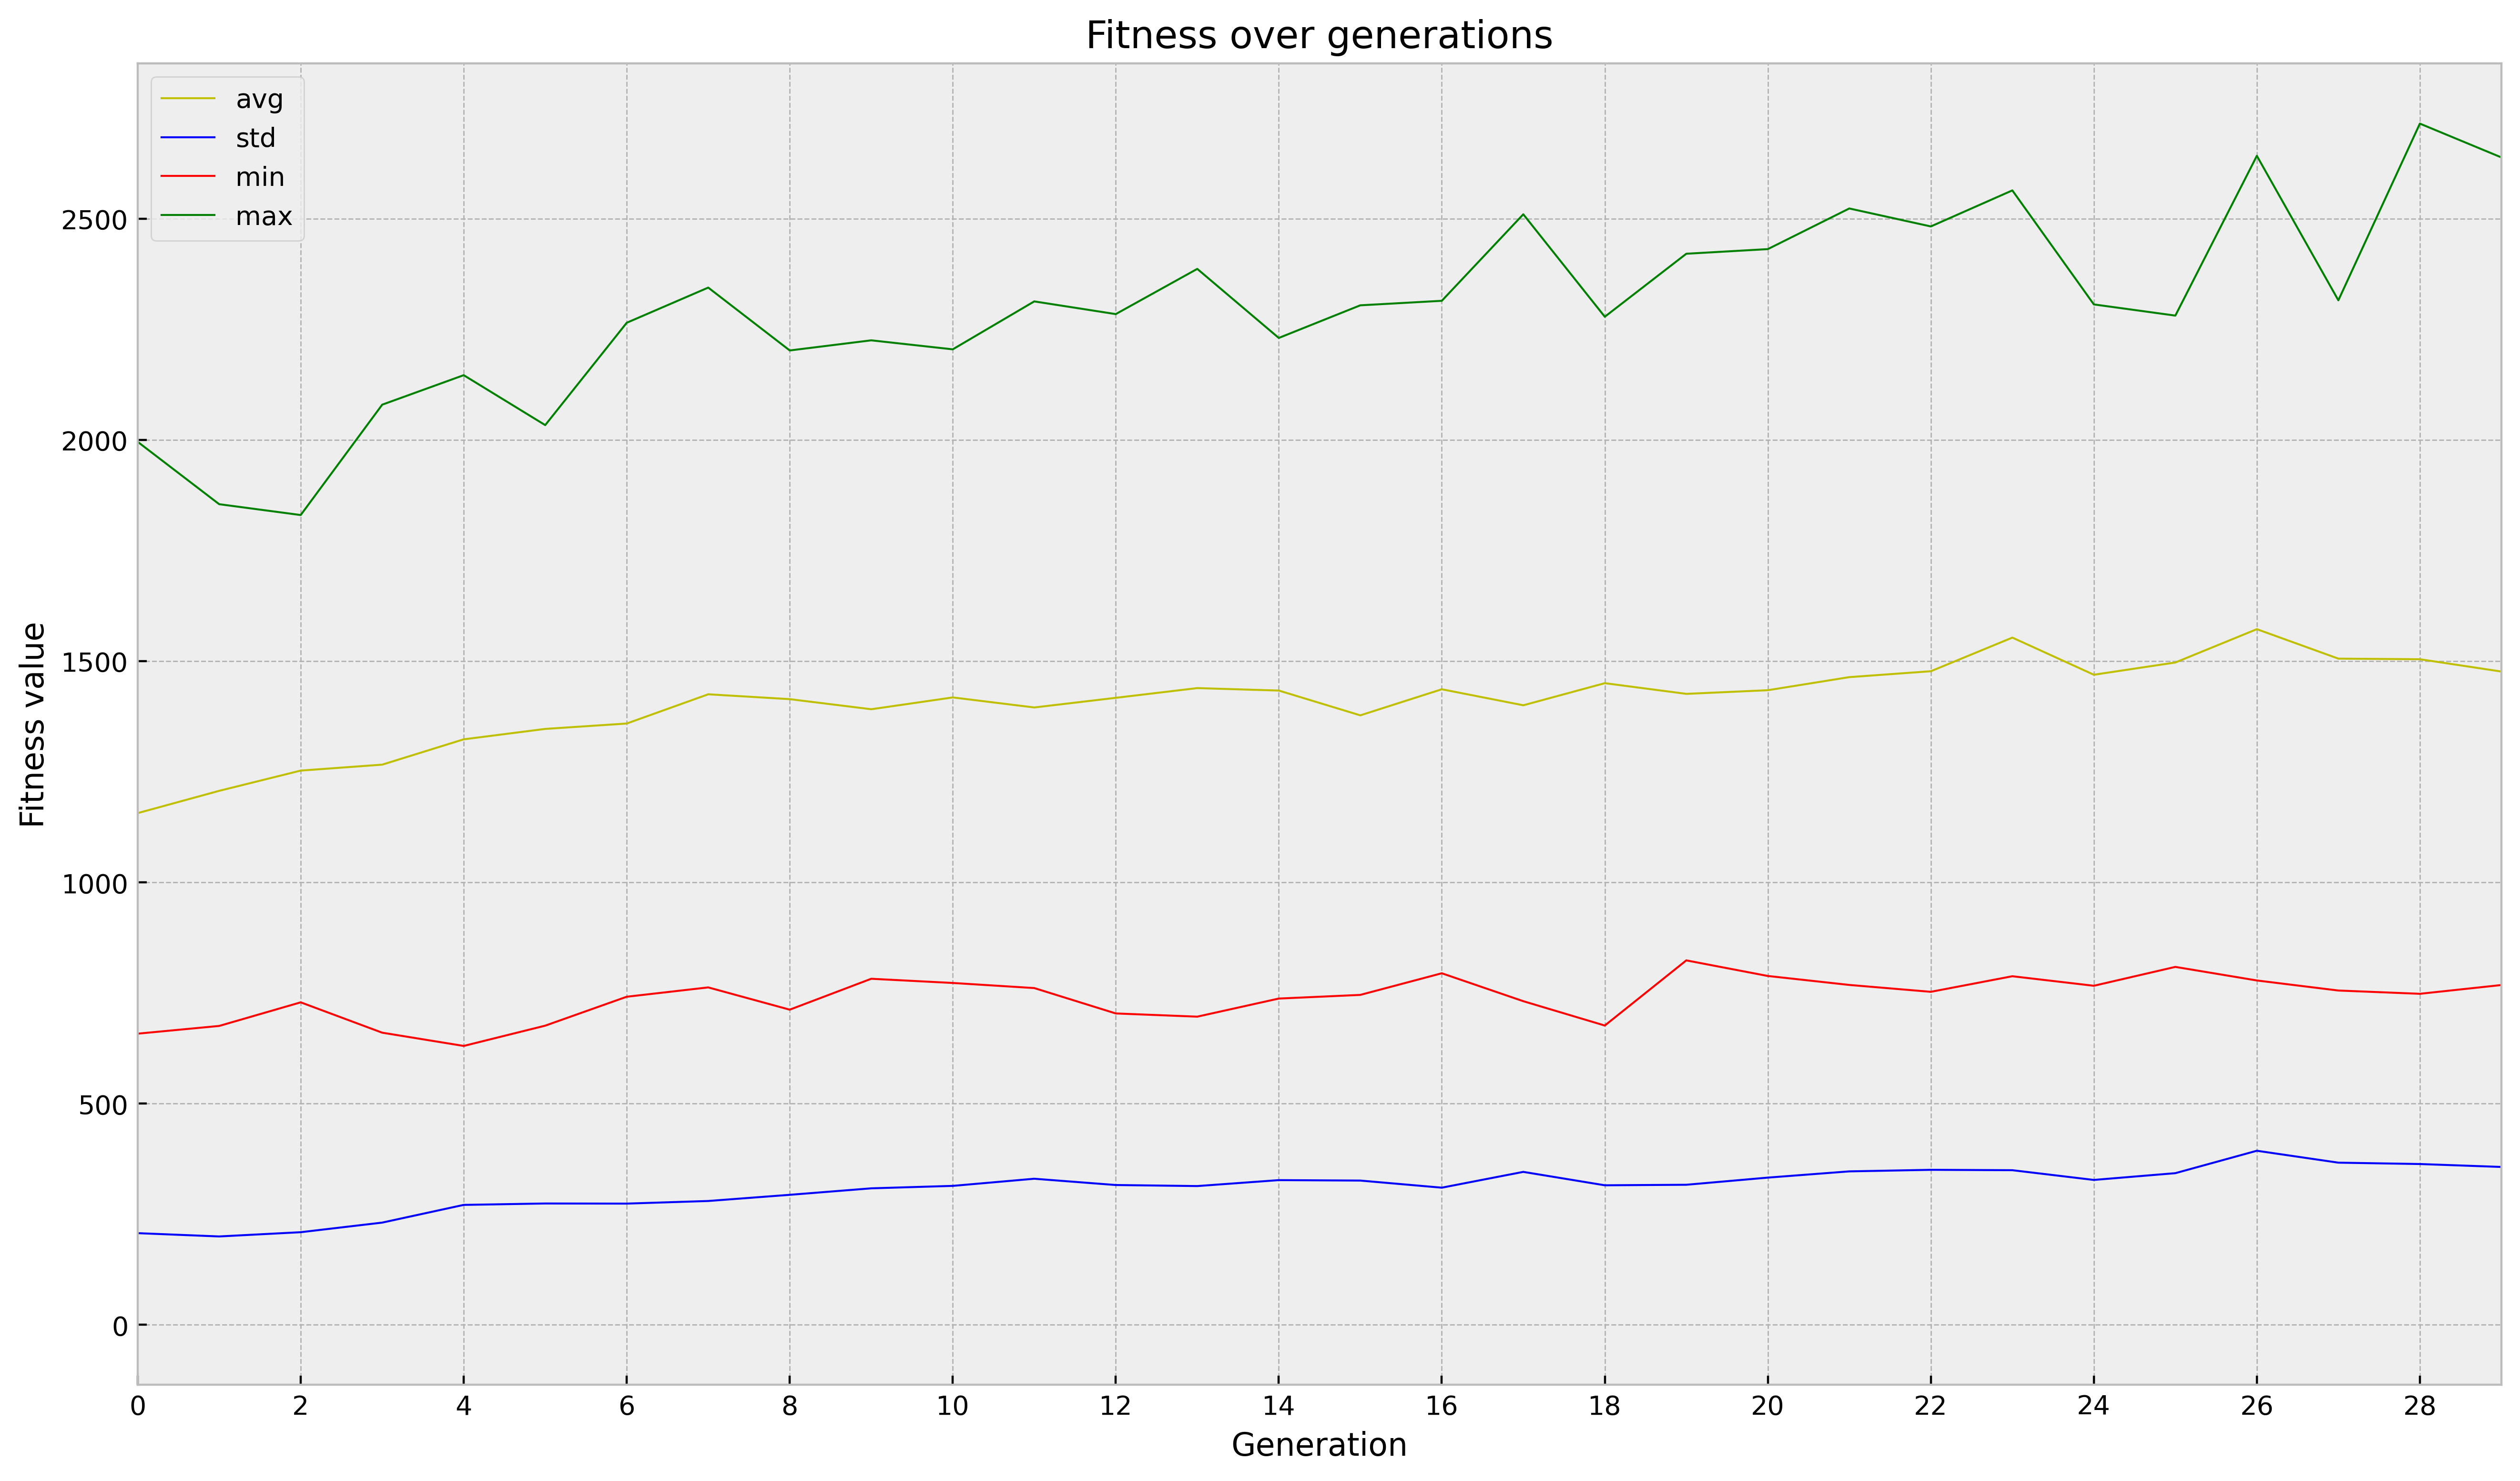

In [6]:
plot_fitness_over_generations(best_logbook)

In [7]:
best_strategy = hall_of_fame[0]
buy_strategy, sell_strategy = np.array_split(best_strategy, 2)
pd.DataFrame(
    zip(ta_features.columns, buy_strategy, sell_strategy),
    columns=["feature", "buy strategy weight", "sell strategy weight"],
)

,feature,buy strategy weight,sell strategy weight
0,volume_adi,2.420841,-0.822919
1,volume_obv,-3.272040,3.606752
2,volume_cmf,2.482230,-4.842983
3,volume_fi,-1.931446,-2.780951
4,volume_em,1.216148,-0.856720
...,...,...,...
72,momentum_pvo_signal,3.723307,-4.028669
73,momentum_pvo_hist,-3.856350,-3.482157
74,momentum_kama,4.184411,-2.714866
75,others_dr,4.352953,-4.105491


In [8]:
print_strategy(stock_data, ta_features, best_strategy, INITIAL_MONEY, COMMISSION)

      DATE:   2012-09-28        ACTION:          buy          OPEN:     43817.67         MONEY:            0        SHARES:  0.022821843
      DATE:   2012-10-02        ACTION:         sell          OPEN:      44144.2         MONEY:  1007.452016        SHARES:            0
      DATE:   2012-10-03        ACTION:          buy          OPEN:     44231.61         MONEY:            0        SHARES:  0.022776743
      DATE:   2012-11-08        ACTION:         sell          OPEN:     43275.15         MONEY:  985.6669728        SHARES:            0
      DATE:   2012-11-09        ACTION:          buy          OPEN:     43334.43         MONEY:            0        SHARES:  0.022745585
      DATE:   2012-11-15        ACTION:         sell          OPEN:     43725.47         MONEY:  994.5614064        SHARES:            0
      DATE:   2012-11-16        ACTION:          buy          OPEN:     43867.41         MONEY:            0        SHARES:  0.022671988
      DATE:   2013-01-03        ACTION:  

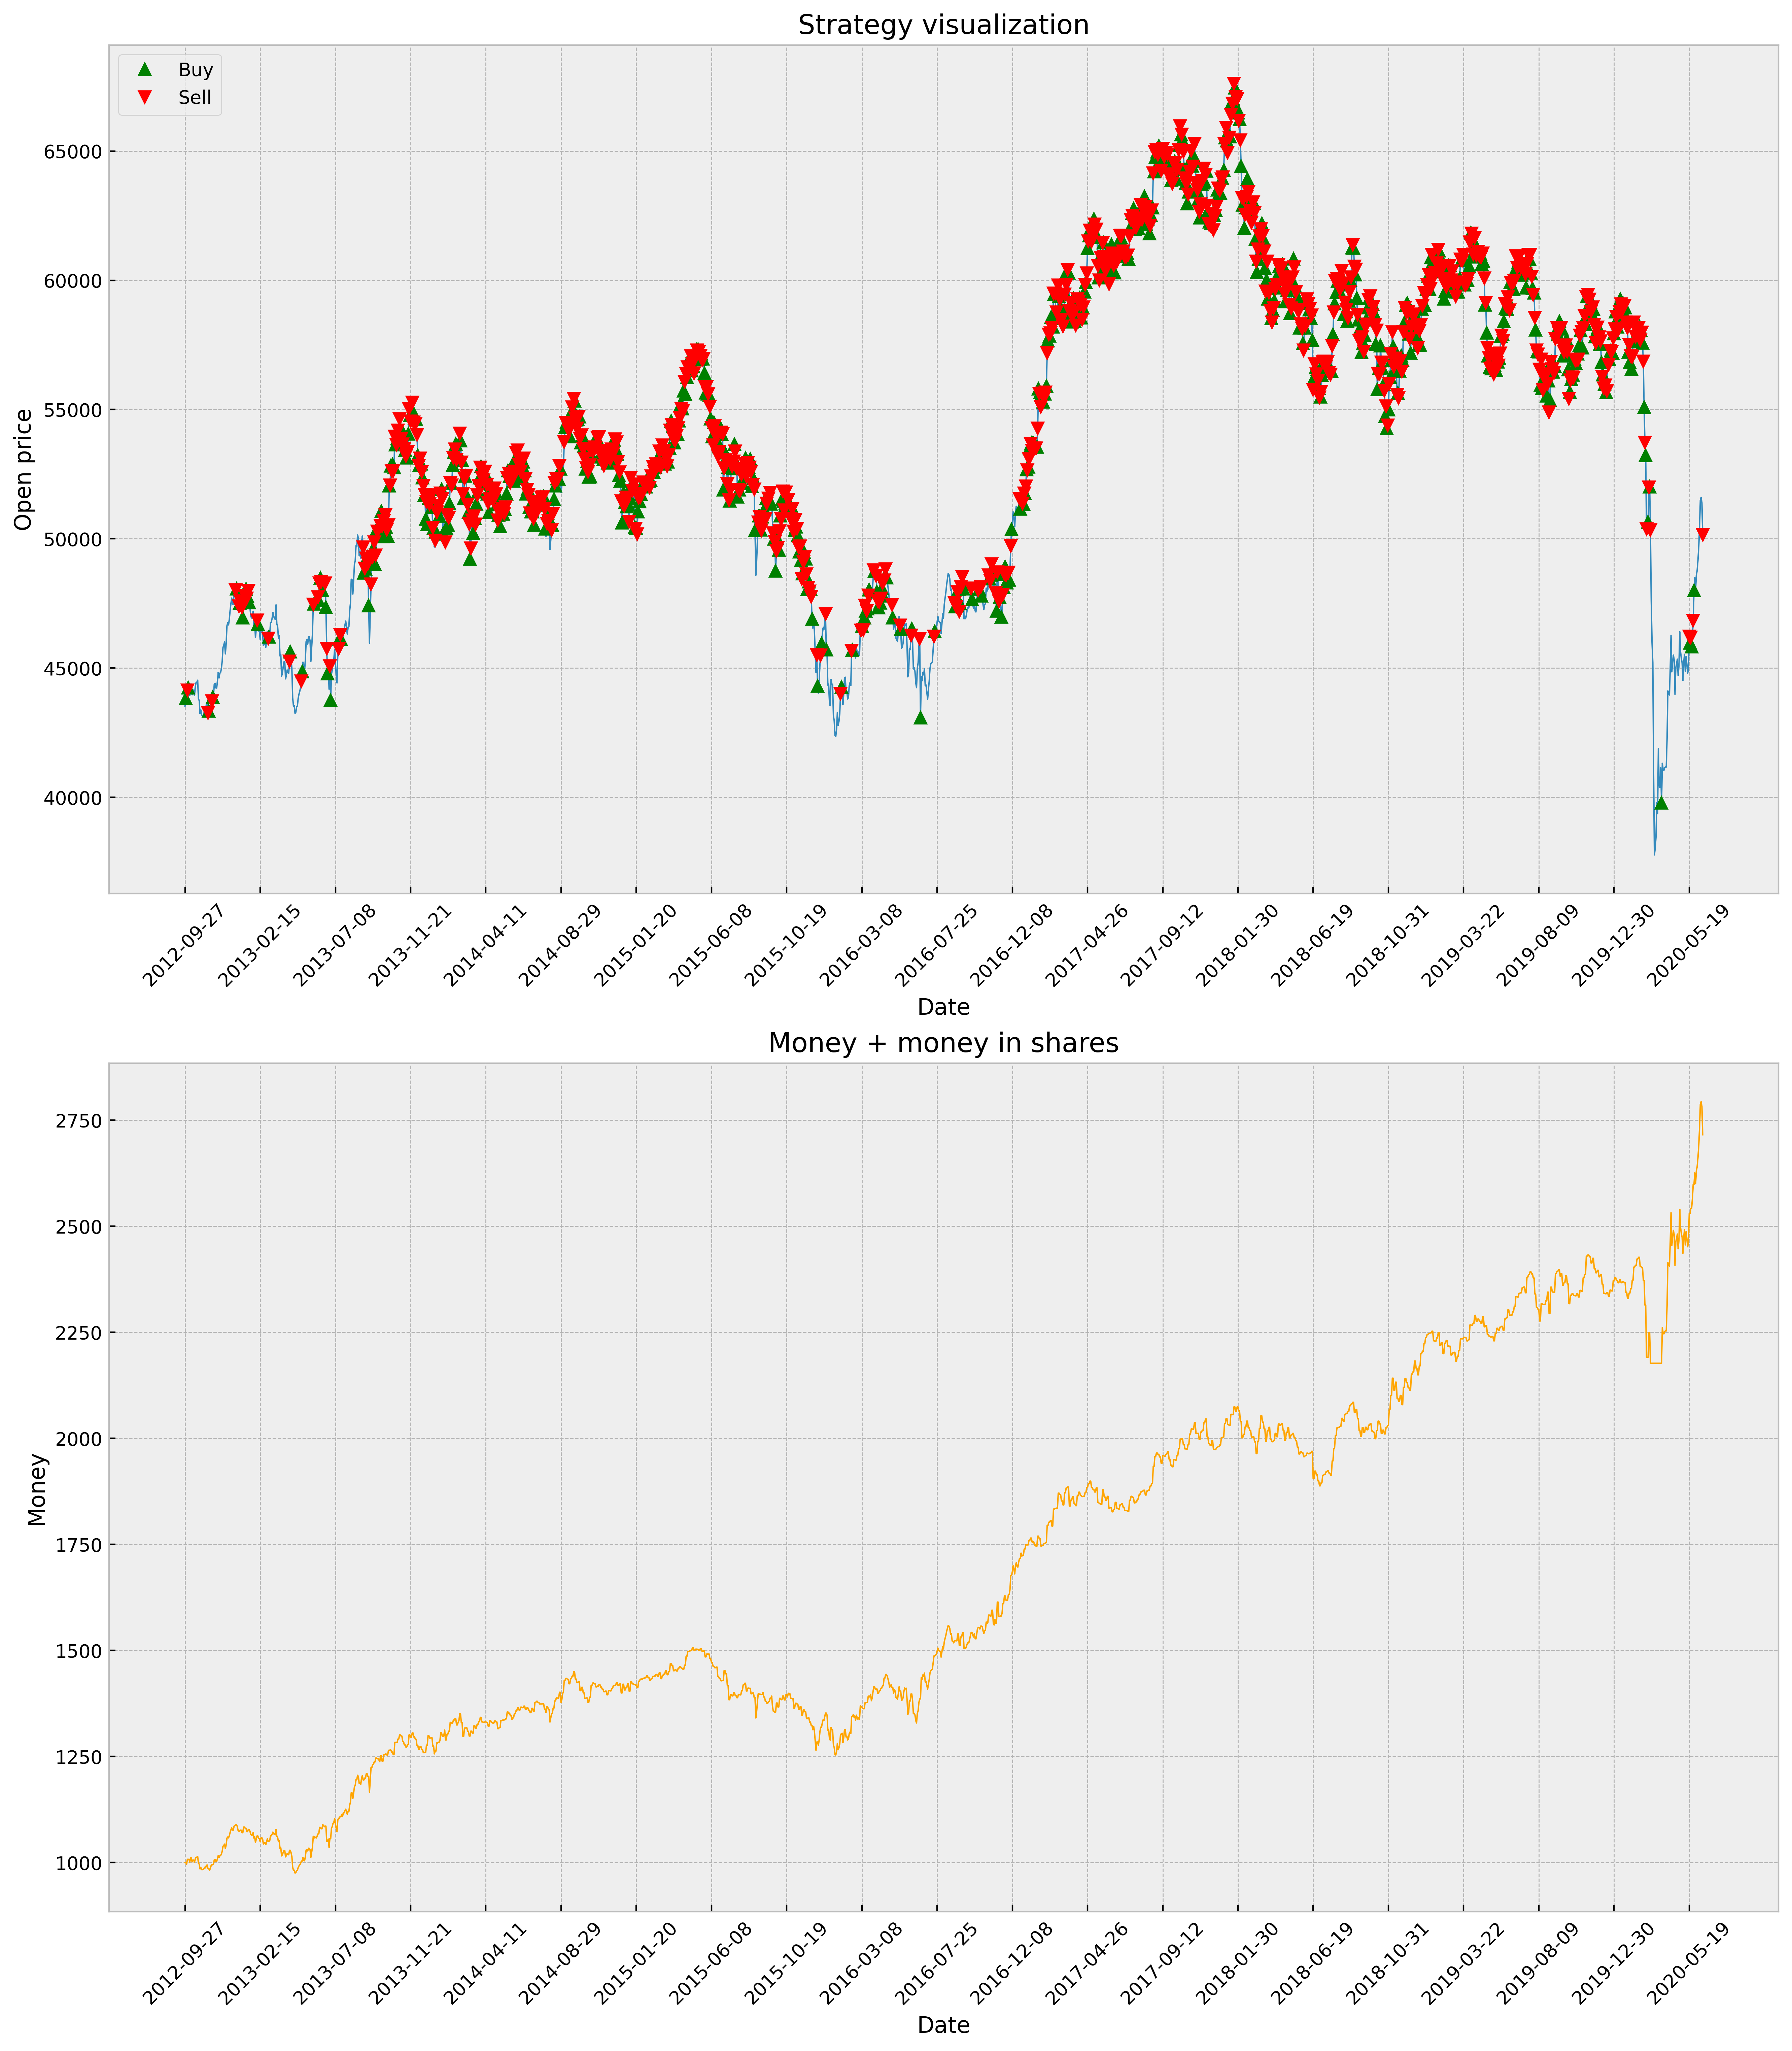

In [9]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    best_strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)